In [8]:
# Imports
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import os

# Check GPU
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  1


In [9]:
# Dataset Paths
BASE_DIR = "/kaggle/input/sports-classification"

TRAIN_DIR = os.path.join(BASE_DIR, "train")
VALID_DIR = os.path.join(BASE_DIR, "valid")
TEST_DIR  = os.path.join(BASE_DIR, "test")

print("Train classes:", len(os.listdir(TRAIN_DIR)))
print("Validation classes:", len(os.listdir(VALID_DIR)))
print("Test classes:", len(os.listdir(TEST_DIR)))


Train classes: 100
Validation classes: 100
Test classes: 100


In [10]:
# Load Datasets
IMG_SIZE = (128, 128)
BATCH_SIZE = 32

train_ds = tf.keras.utils.image_dataset_from_directory(
    TRAIN_DIR,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="categorical"
)

valid_ds = tf.keras.utils.image_dataset_from_directory(
    VALID_DIR,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="categorical"
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    TEST_DIR,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="categorical"
)


Found 13492 files belonging to 100 classes.
Found 500 files belonging to 100 classes.
Found 500 files belonging to 100 classes.


In [11]:
# Optimize Dataset Pipeline
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
valid_ds = valid_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds  = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

# Extract class names correctly
class_names = os.listdir(TRAIN_DIR)
print("Classes:", len(class_names))


Classes: 100


In [12]:
#  Augmentation
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])


In [13]:
# CNN Model
num_classes = len(class_names)

model = models.Sequential([
    layers.Rescaling(1./255, input_shape=IMG_SIZE + (3,)),

    data_augmentation,

    layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D(),

    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D(),

    layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D(),

    layers.Dropout(0.4),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential (Sequential)         │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     8,388,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        25,700 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,703,492 (33.20 MB)

 Trainable params: 8,702,532 (33.20 MB)

 Non-trainable params: 960 (3.75 KB)

In [14]:
#  Compile
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)


In [15]:
# Train
history = model.fit(
    train_ds,
    validation_data=valid_ds,
    epochs=30
)


Epoch 1/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 69s 87ms/step - accuracy: 0.0711 - loss: 4.4010 - val_accuracy: 0.1060 - val_loss: 3.8291
Epoch 2/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 34s 81ms/step - accuracy: 0.2020 - loss: 3.2936 - val_accuracy: 0.2840 - val_loss: 2.8367
Epoch 3/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 34s 80ms/step - accuracy: 0.2794 - loss: 2.9076 - val_accuracy: 0.3640 - val_loss: 2.5352
Epoch 4/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 34s 80ms/step - accuracy: 0.3413 - loss: 2.6167 - val_accuracy: 0.3760 - val_loss: 2.4781
Epoch 5/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 80ms/step - accuracy: 0.3882 - loss: 2.3772 - val_accuracy: 0.4960 - val_loss: 1.9134
Epoch 6/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 34s 80ms/step - accuracy: 0.4166 - loss: 2.2589 - val_accuracy: 0.4420 - val_loss: 2.0958
Epoch 7/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 80ms/step - accuracy: 0.4420 - loss: 2.1339 - val_accuracy: 0.3960 - val_loss: 2.3438
Epoch 8/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 34s 80ms/step - accuracy: 0.4685 - loss: 2.0163 - 

In [16]:
# Evaluate
loss, acc = model.evaluate(test_ds)
print(f"Test Accuracy: {acc*100:.2f}%")


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.7150 - loss: 1.0662
Test Accuracy: 71.60%


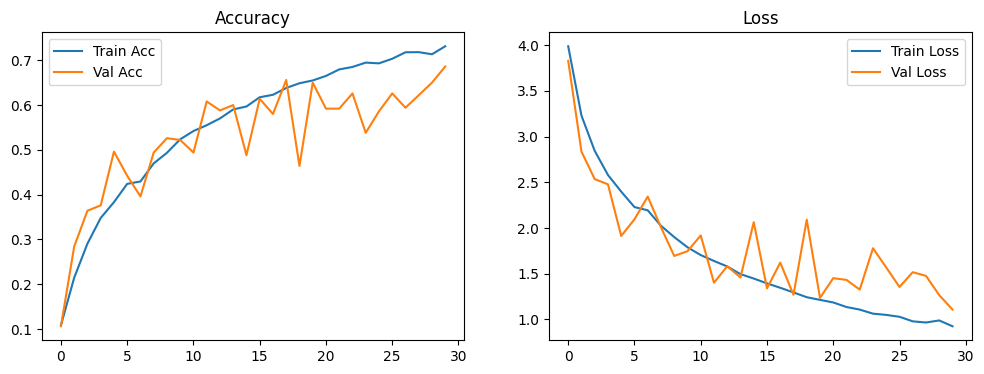

In [17]:
# Plot Accuracy & Loss
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label="Train Acc")
plt.plot(history.history['val_accuracy'], label="Val Acc")
plt.legend()
plt.title("Accuracy")

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Val Loss")
plt.legend()
plt.title("Loss")

plt.show()


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7150 - loss: 1.0662

✅ Final Test Accuracy: 0.7160, Test Loss: 0.9950
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step


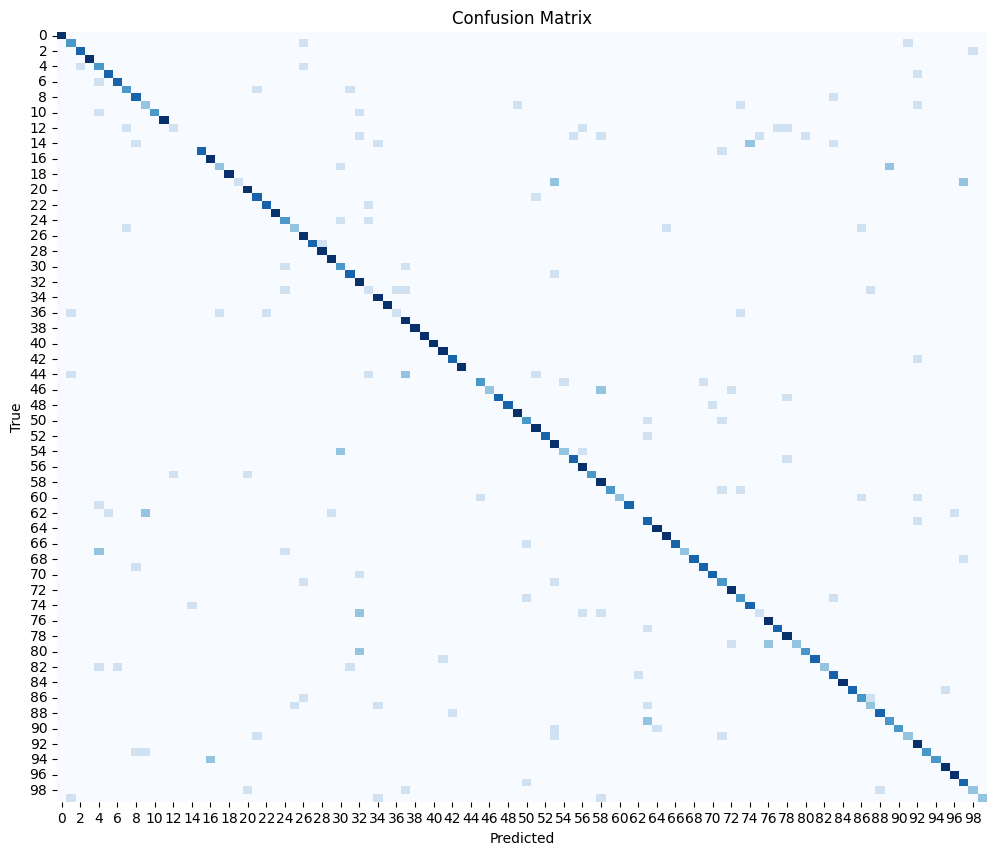


Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.50      0.60      0.55         5
           2       0.80      0.80      0.80         5
           3       1.00      1.00      1.00         5
           4       0.33      0.60      0.43         5
           5       0.80      0.80      0.80         5
           6       0.80      0.80      0.80         5
           7       0.60      0.60      0.60         5
           8       0.57      0.80      0.67         5
           9       0.40      0.40      0.40         5
          10       1.00      0.60      0.75         5
          11       1.00      1.00      1.00         5
          12       0.50      0.20      0.29         5
          13       0.00      0.00      0.00         5
          14       0.00      0.00      0.00         5
          15       1.00      0.80      0.89         5
          16       0.71      1.00      0.83         5
  

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Evaluate on test set
test_loss, test_acc = model.evaluate(test_ds)
print(f"\n✅ Final Test Accuracy: {test_acc:.4f}, Test Loss: {test_loss:.4f}")

# Get predictions
y_true = np.concatenate([y.numpy() for x, y in test_ds], axis=0)
y_pred_probs = model.predict(test_ds)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_true, axis=1)

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(12,10))
sns.heatmap(cm, cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Classification report (per-class precision/recall/f1)
print("\nClassification Report:\n")
print(classification_report(y_true, y_pred))
